# `COCA COLA DATA CURATION AND ANALYSIS PROJECT`

`BY RONALD ONGORI`

![COCA COLA](brand-valuation_coca_cola.jpg)


In [1]:
# importing relevant libraries

import pandas as pd
import numpy as np
from lxml import html
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

#####  <u>DATA CURATION</u>

In [2]:
# extracting the datasets from the Coca-cola html files 

link = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-12-000007/a2011123110-k.htm#sFD60D13C2AB8AE15B2B55FE75624D861'
link_1 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-15-000005/a2014123110-k.htm#sADED6865E781876F124F634A1CDE019D'
link_2 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-18-000008/a2017123110-k.htm'
link_3 = 'https://investors.coca-colacompany.com/filings-reports/all-sec-filings/content/0000021344-20-000006/a2019123110-k.htm'

In [3]:
# Read tables from the first SEC filing link
df = pd.read_html(link)

# Read tables from the second SEC filing link
df_1 = pd.read_html(link_1)

# Read tables from the third SEC filing link
df_2 = pd.read_html(link_2)

# Read tables from the fourth SEC filing link
df_3 = pd.read_html(link_3)

#### <u>DATA TRANSFORMATION</u>

##### dropping the irrelevant data columns

In [6]:
# extracting the relevant data from the first dataframe

x = [0,2,6,10] # a list of relevant column indices
y = [0,2,5,8] 
df = df[90][x] # trimming the table index 90
df_1 = df_1[88][x] # trimming the table index 88
df_2 = df_2[90][x] # trimming the table index 90 
df_3 = df_3[122][y] # trimming the table index 122

In [7]:
df_1.head(8)

,0,2,6,10
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,"Year Ended December 31,",2014,2013.0,2012.0
4,(In millions except percentages and per share ...,NaN,NaN,NaN
5,NET OPERATING REVENUES,45998,46854.0,48017.0
6,Cost of goods sold,17889,18421.0,19053.0
7,GROSS PROFIT,28109,28433.0,28964.0


##### getting rid of all the missing values in the trimmed tables

In [9]:
# using a for loop to iterate over the dataframes 
# dropping the rows with all NaN values

for i in [df, df_1, df_2, df_3]:
    i.dropna(axis=0, how='all', inplace=True)


In [11]:
df.head()

,0,2,6,10
3,"Year Ended December 31,",2011.0,2010.0,2009.0
4,(In millions except percentages and per share ...,NaN,NaN,NaN
5,NET OPERATING REVENUES,46542.0,35119.0,30990.0
6,Cost of goods sold,18216.0,12693.0,11088.0
7,GROSS PROFIT,28326.0,22426.0,19902.0


In [19]:
df_1.head(4)

,0,2,6,10
3,"Year Ended December 31,",2014,2013.0,2012.0
4,(In millions except percentages and per share ...,NaN,NaN,NaN
5,NET OPERATING REVENUES,45998,46854.0,48017.0
6,Cost of goods sold,17889,18421.0,19053.0


In [20]:
df_2.head(4)

,0,2,6,10
3,"Year Ended December 31,",2017,2016,2015
4,(In millions except percentages and per share ...,NaN,NaN,NaN
5,NET OPERATING REVENUES,35410,41863,44294
6,Cost of goods sold,13256,16465,17482


In [22]:
df_3.head(4)

,0,2,5,8
2,"Year Ended December 31,",2019.0,2018,2017
3,Net Operating Revenues,37266.0,34300,36212
4,Cost of goods sold,14619.0,13067,13721
5,Gross Profit,22647.0,21233,22491


In [12]:
# dropping row indices 3 and 4 from the first three dataframes

for m in [df, df_1, df_2]:
    m.drop(index=[3,4], inplace=True)
    
df_3.drop(index=2, columns=8, inplace=True)


##### changing the data labels for the column headers 

In [13]:

# Set column names for the first dataframe based on the corresponding years
df.columns = ['Year Ended December 31', '2011', '2010', '2009']

# Set column names for the second dataframe based on the corresponding years
df_1.columns = ['Year Ended December 31', '2014', '2013', '2012']

# Set column names for the third dataframe based on the corresponding years
df_2.columns = ['Year Ended December 31', '2017', '2016', '2015']

# Set column names for the fourth dataframe based on the corresponding years
df_3.columns = ['Year Ended December 31', '2019', '2018']


In [14]:
# checking for the new column names in the first dataframe

df.head()

,Year Ended December 31,2011,2010,2009
5,NET OPERATING REVENUES,46542.0,35119.0,30990.0
6,Cost of goods sold,18216.0,12693.0,11088.0
7,GROSS PROFIT,28326.0,22426.0,19902.0
8,GROSS PROFIT MARGIN,60.9,63.9,64.2
9,"Selling, general and administrative expenses",17440.0,13158.0,11358.0


In [16]:
# checking for the new column names in the second dataframe

df_1.head()

,Year Ended December 31,2014,2013,2012
5,NET OPERATING REVENUES,45998,46854.0,48017.0
6,Cost of goods sold,17889,18421.0,19053.0
7,GROSS PROFIT,28109,28433.0,28964.0
8,GROSS PROFIT MARGIN,61.1,60.7,60.3
9,"Selling, general and administrative expenses",17218,17310.0,17738.0


In [17]:
# checking for the new column names in the third dataframe

df_2.head()

,Year Ended December 31,2017,2016,2015
5,NET OPERATING REVENUES,35410,41863,44294
6,Cost of goods sold,13256,16465,17482
7,GROSS PROFIT,22154,25398,26812
8,GROSS PROFIT MARGIN,62.6,60.7,60.5
9,"Selling, general and administrative expenses",12496,15262,16427


In [18]:
# checking for the new column names in the forth dataframe

df_3.head()

,Year Ended December 31,2019,2018
3,Net Operating Revenues,37266.0,34300
4,Cost of goods sold,14619.0,13067
5,Gross Profit,22647.0,21233
6,"Selling, general and administrative expenses",12103.0,11002
7,Other operating charges,458.0,1079


##### <u>Data inspection  </u>

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 5 to 24
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2011                    20 non-null     float64
 2   2010                    20 non-null     float64
 3   2009                    20 non-null     float64
dtypes: float64(3), object(1)
memory usage: 800.0+ bytes


In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 5 to 24
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2014                    20 non-null     object 
 2   2013                    20 non-null     float64
 3   2012                    20 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [21]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, 5 to 26
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year Ended December 31  22 non-null     object
 1   2017                    22 non-null     object
 2   2016                    22 non-null     object
 3   2015                    22 non-null     object
dtypes: object(4)
memory usage: 880.0+ bytes


In [22]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 3 to 22
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year Ended December 31  20 non-null     object 
 1   2019                    20 non-null     float64
 2   2018                    20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 640.0+ bytes


##### changing the data labels for the row headers

In [23]:
# resetting the index for each dataframe from zero

for i in [df, df_1, df_2, df_3]:
    i.reset_index(drop=True, inplace=True)


In [24]:
# checking the first dataframe for the new index values

df.head(4)

,Year Ended December 31,2011,2010,2009
0,NET OPERATING REVENUES,46542.0,35119.0,30990.0
1,Cost of goods sold,18216.0,12693.0,11088.0
2,GROSS PROFIT,28326.0,22426.0,19902.0
3,GROSS PROFIT MARGIN,60.9,63.9,64.2


In [25]:
# checking the second dataframe for the new index values

df_1.head(4)

,Year Ended December 31,2014,2013,2012
0,NET OPERATING REVENUES,45998,46854.0,48017.0
1,Cost of goods sold,17889,18421.0,19053.0
2,GROSS PROFIT,28109,28433.0,28964.0
3,GROSS PROFIT MARGIN,61.1,60.7,60.3


In [26]:
# checking the third dataframe for the new index values

df_2.head(4)

,Year Ended December 31,2017,2016,2015
0,NET OPERATING REVENUES,35410,41863,44294
1,Cost of goods sold,13256,16465,17482
2,GROSS PROFIT,22154,25398,26812
3,GROSS PROFIT MARGIN,62.6,60.7,60.5


In [27]:
# checking the forth dataframe for the new index values

df_3.head(4)

,Year Ended December 31,2019,2018
0,Net Operating Revenues,37266.0,34300
1,Cost of goods sold,14619.0,13067
2,Gross Profit,22647.0,21233
3,"Selling, general and administrative expenses",12103.0,11002


##### data consistency 

In [31]:
# converting the string values in the first datacolumn to lowercase

for i in [df, df_1, df_2, df_3]:
    i['Year Ended December 31'] = i['Year Ended December 31'].str.lower()
    

In [32]:
# deleting rows with index values 15 and 16 from the third pandas dataframe
df_2.drop(index=[15,16], inplace=True)

df_2.reset_index(drop=True, inplace=True)

In [33]:
# changing the values at index 13 and 14 of the third dataframe
# this is done to match the values in the first, second and forth dataframes

new_values = ['income before income taxes', 'income taxes']  
index_values = [12, 13]  

for i, index in enumerate(index_values):
    df_2.at[index, 'Year Ended December 31'] = new_values[i]


In [34]:
# inserting a new blank row

new_row = pd.DataFrame(index=[2.5], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:2], new_row, df_3.iloc[2:]]).reset_index(drop=True)
df_3.iloc[2]


Year Ended December 31    NaN
2019                      NaN
2018                      NaN
Name: 2, dtype: object

In [35]:
# inserting new values in the newly created data row

new_values = ['gross profit', 22647.00, 21233]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[2, column] = new_values[i]
        i += 1
    
df_3.iloc[2]

Year Ended December 31    gross profit
2019                           22647.0
2018                             21233
Name: 2, dtype: object

In [36]:
# inserting a new data value at row index 10 and column index 2018

df_3.at[10, '2018'] = -1674.00

In [37]:
# converting the 2018 column data type to float 

df_3['2018'] = df_3['2018'].astype(float)

#####  data validation 

In [38]:
# calculating the gross profit margin for the year 2019 and 2018
df_3.at[3, '2019'] = (df_3.at[2, '2019']/df_3.at[0, '2019'])*100
df_3.at[3, '2018'] = (df_3.at[2, '2018']/df_3.at[0, '2018'])*100

# inserting the new data values at row index 3 and column index 'Year Ended December 31'
df_3.at[3, 'Year Ended December 31'] = 'gross profit margin'
df_3.iloc[3]

Year Ended December 31    gross profit margin
2019                                60.771212
2018                                 61.90379
Name: 3, dtype: object

In [39]:
# dropping row indices 18, 19, and 20
df_3.drop(index=[18,19,20], inplace=True)

In [40]:
new_row = pd.DataFrame(index=[7], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:7], new_row, df_3.iloc[7:]]).reset_index(drop=True)

In [41]:
# inserting new values in the newly created data row

new_values = ['operating margin', (df_3.at[6, '2019']/df_3.at[0, '2019']*100), (df_3.at[6, '2018']/df_3.at[0, '2018']*100)]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[7, column] = new_values[i]
        i += 1
    
df_3.iloc[7]

Year Ended December 31    operating margin
2019                             27.064885
2018                             26.682216
Name: 7, dtype: object

In [42]:
new_row = pd.DataFrame(index=[14], columns=df_3.columns)
df_3 = pd.concat([df_3.iloc[:14], new_row, df_3.iloc[14:]]).reset_index(drop=True)

In [43]:
# inserting new values in the newly created data row

new_values = ['effective tax rate', (df_3.at[13, '2019']/df_3.at[12, '2019']*100), (df_3.at[13, '2018']/df_3.at[12, '2018']*100)]
i = 0
while i < 3:  
    for column in df_3.columns:
        df_3.at[14, column] = new_values[i]
        i += 1
    
df_3

,Year Ended December 31,2019,2018
0,net operating revenues,37266.000000,34300.000000
1,cost of goods sold,14619.000000,13067.000000
2,gross profit,22647.000000,21233.000000
3,gross profit margin,60.771212,61.903790
4,"selling, general and administrative expenses",12103.000000,11002.000000
5,other operating charges,458.000000,1079.000000
6,operating income,10086.000000,9152.000000
7,operating margin,27.064885,26.682216
8,interest income,563.000000,689.000000
9,interest expense,946.000000,950.000000


In [44]:
df_3.at[16, 'Year Ended December 31'] = 'less: net income attributable to noncontrolling interests'

In [45]:
new_values = [-1666, 1234]
i = 0
while i < 2:  
    for column in ['2017', '2016']:
        df_2.at[11, column] = new_values[i]
        i += 1
    
df_2.iloc[11]

Year Ended December 31    other income (loss) — net
2017                                          -1666
2016                                           1234
2015                                            631
Name: 11, dtype: object

In [46]:
for i in ['2017', '2016', '2015']:
    df_2[i] = df_2[i].astype(float)
    
df_2.dtypes

Year Ended December 31     object
2017                      float64
2016                      float64
2015                      float64
dtype: object

In [47]:
df_1.at[11, '2014'] = -1263.00

In [48]:
df_1['2014'] = df_1['2014'].astype(float)

In [50]:
df_2.at[17, 'Year Ended December 31'] = 'net income attributable to shareowners of the coca-cola company'

#### <u> DATASET MERGING </u>

In [55]:
df_0 = df_1.merge(df, on='Year Ended December 31', how='outer')
df_0

,Year Ended December 31,2014,2013,2012,2011,2010,2009
0,net operating revenues,45998.00,46854.00,48017.00,46542.00,35119.00,30990.00
1,cost of goods sold,17889.00,18421.00,19053.00,18216.00,12693.00,11088.00
2,gross profit,28109.00,28433.00,28964.00,28326.00,22426.00,19902.00
3,gross profit margin,61.10,60.70,60.30,60.90,63.90,64.20
4,"selling, general and administrative expenses",17218.00,17310.00,17738.00,17440.00,13158.00,11358.00
5,other operating charges,1183.00,895.00,447.00,732.00,819.00,313.00
6,operating income,9708.00,10228.00,10779.00,10154.00,8449.00,8231.00
7,operating margin,21.10,21.80,22.40,21.80,24.10,26.60
8,interest income,594.00,534.00,471.00,483.00,317.00,249.00
9,interest expense,483.00,463.00,397.00,417.00,733.00,355.00


In [56]:
merge_df = df_3.merge(df_2, on='Year Ended December 31', how='outer')
merge_df

,Year Ended December 31,2019,2018,2017,2016,2015
0,net operating revenues,37266.000000,34300.000000,35410.00,41863.00,44294.00
1,cost of goods sold,14619.000000,13067.000000,13256.00,16465.00,17482.00
2,gross profit,22647.000000,21233.000000,22154.00,25398.00,26812.00
3,gross profit margin,60.771212,61.903790,62.60,60.70,60.50
4,"selling, general and administrative expenses",12103.000000,11002.000000,12496.00,15262.00,16427.00
5,other operating charges,458.000000,1079.000000,2157.00,1510.00,1657.00
6,operating income,10086.000000,9152.000000,7501.00,8626.00,8728.00
7,operating margin,27.064885,26.682216,21.20,20.60,19.70
8,interest income,563.000000,689.000000,677.00,642.00,613.00
9,interest expense,946.000000,950.000000,841.00,733.00,856.00


In [53]:
df_0.at[17, 'Year Ended December 31'] = 'net income attributable to shareowners of the coca-cola company'

In [57]:
full_dataset = merge_df.merge(df_0, on='Year Ended December 31', how='outer')
full_dataset['2019'] = round(full_dataset['2019'], 2)
full_dataset['2018'] = round(full_dataset['2018'], 2)
full_dataset

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.00,34300.00,35410.00,41863.00,44294.00,45998.00,46854.00,48017.00,46542.00,35119.00,30990.00
1,cost of goods sold,14619.00,13067.00,13256.00,16465.00,17482.00,17889.00,18421.00,19053.00,18216.00,12693.00,11088.00
2,gross profit,22647.00,21233.00,22154.00,25398.00,26812.00,28109.00,28433.00,28964.00,28326.00,22426.00,19902.00
3,gross profit margin,60.77,61.90,62.60,60.70,60.50,61.10,60.70,60.30,60.90,63.90,64.20
4,"selling, general and administrative expenses",12103.00,11002.00,12496.00,15262.00,16427.00,17218.00,17310.00,17738.00,17440.00,13158.00,11358.00
5,other operating charges,458.00,1079.00,2157.00,1510.00,1657.00,1183.00,895.00,447.00,732.00,819.00,313.00
6,operating income,10086.00,9152.00,7501.00,8626.00,8728.00,9708.00,10228.00,10779.00,10154.00,8449.00,8231.00
7,operating margin,27.06,26.68,21.20,20.60,19.70,21.10,21.80,22.40,21.80,24.10,26.60
8,interest income,563.00,689.00,677.00,642.00,613.00,594.00,534.00,471.00,483.00,317.00,249.00
9,interest expense,946.00,950.00,841.00,733.00,856.00,483.00,463.00,397.00,417.00,733.00,355.00


####  SAVING COMPLETE DATASET TO A COCA-COLA CSV File

In [58]:
full_dataset.to_csv('coca_cola(2019-09).csv', index=False)

In [59]:
graph_0 = full_dataset.iloc[[0]]
graph_0

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.0,34300.0,35410.0,41863.0,44294.0,45998.0,46854.0,48017.0,46542.0,35119.0,30990.0


In [60]:
graph_0 = graph_0.T
graph_0

,0
Year Ended December 31,net operating revenues
2019,37266.0
2018,34300.0
2017,35410.0
2016,41863.0
2015,44294.0
2014,45998.0
2013,46854.0
2012,48017.0
2011,46542.0


In [61]:
graph_0.reset_index(inplace=True)
graph_0

,index,0
0,Year Ended December 31,net operating revenues
1,2019,37266.0
2,2018,34300.0
3,2017,35410.0
4,2016,41863.0
5,2015,44294.0
6,2014,45998.0
7,2013,46854.0
8,2012,48017.0
9,2011,46542.0


In [62]:
graph_0.columns = ['Year', 'Revenue']
graph_0.drop(index = 0, inplace=True)
graph_0

,Year,Revenue
1,2019,37266.0
2,2018,34300.0
3,2017,35410.0
4,2016,41863.0
5,2015,44294.0
6,2014,45998.0
7,2013,46854.0
8,2012,48017.0
9,2011,46542.0
10,2010,35119.0


In [63]:
graph_1 = full_dataset.iloc[[0,2],:]
graph_1

,Year Ended December 31,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009
0,net operating revenues,37266.0,34300.0,35410.0,41863.0,44294.0,45998.0,46854.0,48017.0,46542.0,35119.0,30990.0
2,gross profit,22647.0,21233.0,22154.0,25398.0,26812.0,28109.0,28433.0,28964.0,28326.0,22426.0,19902.0


In [64]:
graph_1 = graph_1.T
graph_1

,0,2
Year Ended December 31,net operating revenues,gross profit
2019,37266.0,22647.0
2018,34300.0,21233.0
2017,35410.0,22154.0
2016,41863.0,25398.0
2015,44294.0,26812.0
2014,45998.0,28109.0
2013,46854.0,28433.0
2012,48017.0,28964.0
2011,46542.0,28326.0


In [65]:
graph_1.reset_index(inplace=True)

In [66]:
graph_1.columns = ['Year', 'Revenue', 'Profit']
graph_1.drop(index = 0, inplace=True)
graph_1

,Year,Revenue,Profit
1,2019,37266.0,22647.0
2,2018,34300.0,21233.0
3,2017,35410.0,22154.0
4,2016,41863.0,25398.0
5,2015,44294.0,26812.0
6,2014,45998.0,28109.0
7,2013,46854.0,28433.0
8,2012,48017.0,28964.0
9,2011,46542.0,28326.0
10,2010,35119.0,22426.0


#### DATA VISUALIZATIONS

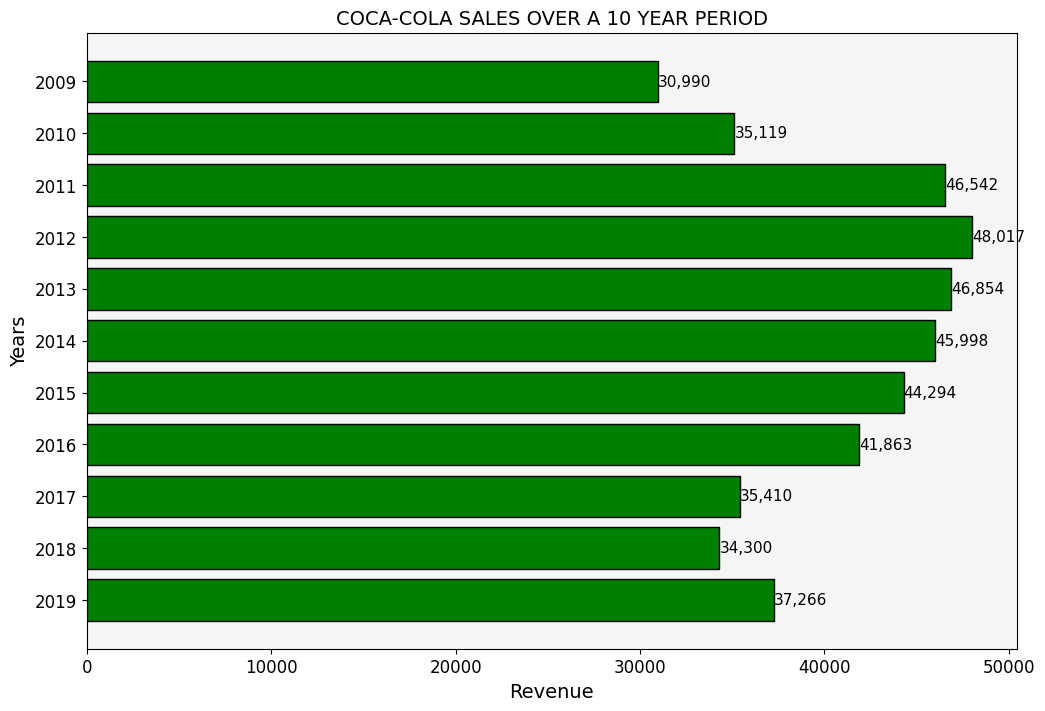

In [70]:
# Set the figure size to 12 x 8 for a horizontal layout
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars for revenue over the years
ax.barh(graph_0['Year'], graph_0['Revenue'], color='green', edgecolor='black', height=0.8)

# Set the labels and title
ax.set_xlabel('Revenue', fontsize=14)
ax.set_ylabel('Years', fontsize=14)
ax.set_title('COCA-COLA SALES OVER A 10 YEAR PERIOD', fontsize=14)

# Display data values at the end of each bar
for x, y in zip(graph_0['Revenue'], graph_0['Year']):
    ax.text(x, y, f"{x:,.0f}", ha='left', va='center', fontsize=11)  # Use x instead of y for the value

# Set the font size of the x-axis and y-axis tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

# Set the background color to a light gray
ax.set_facecolor('#F5F5F5')

plt.show()

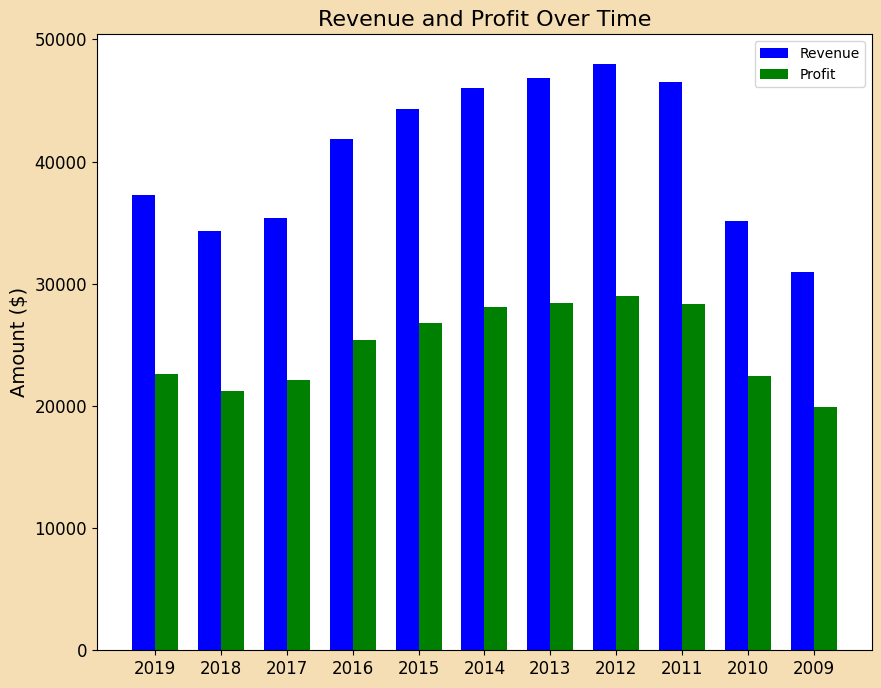

In [72]:
# Set the figure size and background color
fig, ax = plt.subplots(figsize=(10, 8))
fig.patch.set_facecolor('#F5DEB3')

# Set the bar width
bar_width = 0.35

# Set the positions for the bars
bar_positions1 = np.arange(len(graph_1['Year']))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

# Plot the Revenue and Profit bars
ax.bar(bar_positions1, graph_1['Revenue'], color='blue', width=bar_width, label='Revenue')
ax.bar(bar_positions2, graph_1['Profit'], color='green', width=bar_width, label='Profit')

# Set the x-axis labels, tick positions, and tick label size
ax.set_xticks([pos + bar_width / 2 for pos in bar_positions1])
ax.set_xticklabels(graph_1['Year'])
ax.tick_params(axis='x', which='major', labelsize=12)

# Set the y-axis label and tick label size
ax.set_ylabel('Amount ($)', fontsize=14)
ax.tick_params(axis='y', which='major', labelsize=12)

# Set the plot title and legend
ax.set_title('Revenue and Profit Over Time', fontsize=16)
ax.legend(loc='best')

# Show the plot
plt.show()

## Conclusion in Points:
- Sales peaked in 2013, indicating a successful period likely due to effective strategies or favorable market conditions.
- The subsequent decline in sales suggests challenges such as market saturation or increased competition.
- Profit margins not aligned with sales growth point to potential inefficiencies in cost management or strategic investments that didn't yield immediate returns.
- The late decade recovery in sales hints at possible successful adjustments to market changes or internal strategies.
- Overall, the data reflects Coca-Cola’s resilience in navigating market dynamics over a volatile ten-year period.

## Recommendations

1. **Strategic Cost Management:**
   - Delve into cost structures during high revenue years to discern non-value-adding expenses.

2. **Consumer Engagement:**
   - Reinforce consumer engagement through innovative campaigns to boost brand loyalty and sales.

3. **New Market Exploration:**
   - Explore untapped markets to diversify revenue streams and mitigate risks associated with market saturation.

4. **Product Line Expansion:**
   - Consider expanding the product line to include healthier options, catering to a growing health-conscious consumer base.

5. **Digital Transformation:**
   - Leverage digital transformation to streamline operations, enhance the supply chain, and improve customer experience.

6. **Data-Driven Decisions:**
   - Utilize advanced analytics to inform strategic decisions and predict consumer trends.

7. **Sustainability Initiatives:**
   - Invest in sustainability initiatives that can lead to long-term cost savings and resonate with modern consumers.